In [1]:
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pdb

In [2]:
from config import get_config
import argparse
from Learner import face_learner
from data.data_pipe import get_val_pair
from torchvision import transforms as trans

In [3]:
conf = get_config(training=False)

In [4]:
learner = face_learner(conf, inference=True)

{'data_path': PosixPath('data'), 'work_path': PosixPath('work_space'), 'model_path': PosixPath('work_space/models'), 'log_path': PosixPath('work_space/log'), 'save_path': PosixPath('work_space/save'), 'input_size': [112, 112], 'embedding_size': 512, 'use_mobilfacenet': True, 'net_depth': 50, 'drop_ratio': 0.6, 'net_mode': 'mobilefacenet', 'device': device(type='cuda', index=0), 'test_transform': Compose(
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
), 'data_mode': 'age', 'vgg_folder': PosixPath('data/faces_vgg_112x112'), 'ms1m_folder': PosixPath('data/faces_ms1m_112x112'), 'emore_folder': PosixPath('data/faces_emore'), 'batch_size': 256, 'age_train_file': PosixPath('data/ageid.txt'), 'facebank_path': PosixPath('data/facebank'), 'threshold': 1.5, 'face_limit': 10, 'min_face_size': 30}
MobileFaceNet model generated


In [5]:
learner.load_state(conf, 'final.pth', model_only=True, from_save_folder=True)

> /home/dilip/git/InsightFace_Pytorch/verifacation.py(38)calculate_roc()
-> nrof_pairs = min(len(actual_issame), embeddings1.shape[0])
(Pdb) l
 33  	import pdb
 34  	def calculate_roc(thresholds, embeddings1, embeddings2, actual_issame, nrof_folds=10, pca=0):
 35  	    assert (embeddings1.shape[0] == embeddings2.shape[0])
 36  	    assert (embeddings1.shape[1] == embeddings2.shape[1])
 37  	    pdb.set_trace()
 38  ->	    nrof_pairs = min(len(actual_issame), embeddings1.shape[0])
 39  	    nrof_thresholds = len(thresholds)
 40  	    k_fold = KFold(n_splits=nrof_folds, shuffle=False)
 41  	
 42  	    tprs = np.zeros((nrof_folds, nrof_thresholds))
 43  	    fprs = np.zeros((nrof_folds, nrof_thresholds))
(Pdb) embeddings1.shape
(5000, 512)
(Pdb) embeddings2.shape
(5000, 512)
(Pdb) n
> /home/dilip/git/InsightFace_Pytorch/verifacation.py(39)calculate_roc()
-> nrof_thresholds = len(thresholds)
(Pdb) n
> /home/dilip/git/InsightFace_Pytorch/verifacation.py(40)calculate_roc()
-> k_fold = KFold(

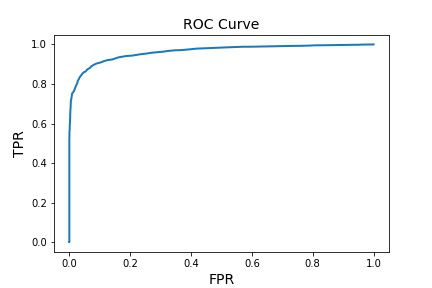

In [7]:
vgg2_fp, vgg2_fp_issame = get_val_pair(conf.emore_folder, 'vgg2_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, vgg2_fp, vgg2_fp_issame, nrof_folds=10, tta=True)
print('vgg2_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [6]:
lag, lag_issame = get_val_pair(conf.emore_folder, 'LAG')

In [ ]:
import numpy as np
lag_issame = np.array([True]*len(lag_issame))

LAG - accuray:0.8083009256506314, threshold:1.768


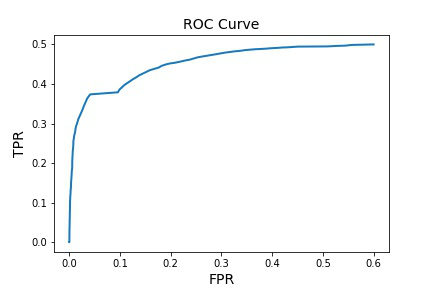

In [7]:
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, lag,lag_issame, nrof_folds=10, tta=True)
print('LAG - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
lag_issame

In [ ]:
agedb_30, agedb_30_issame = get_val_pair(conf.emore_folder, 'agedb_30')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, agedb_30, agedb_30_issame, nrof_folds=10, tta=True)
print('agedb_30 - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
calfw, calfw_issame = get_val_pair(conf.emore_folder, 'calfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, calfw, calfw_issame, nrof_folds=10, tta=True)
print('calfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_ff, cfp_ff_issame = get_val_pair(conf.emore_folder, 'cfp_ff')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_ff, cfp_ff_issame, nrof_folds=10, tta=True)
print('cfp_ff - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_fp, cfp_fp_issame = get_val_pair(conf.emore_folder, 'cfp_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_fp, cfp_fp_issame, nrof_folds=10, tta=True)
print('cfp_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cplfw, cplfw_issame = get_val_pair(conf.emore_folder, 'cplfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cplfw, cplfw_issame, nrof_folds=10, tta=True)
print('cplfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, lfw, lfw_issame, nrof_folds=10, tta=True)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
conf.use_mobilfacenet = True

In [ ]:
learner = face_learner(conf, inference=True)

In [ ]:
learner.load_state(conf, 'mobilefacenet.pth', True, True)

In [ ]:
vgg2_fp, vgg2_fp_issame = get_val_pair(conf.emore_folder, 'vgg2_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, vgg2_fp, vgg2_fp_issame, nrof_folds=10, tta=True)
print('vgg2_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
agedb_30, agedb_30_issame = get_val_pair(conf.emore_folder, 'agedb_30')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, agedb_30, agedb_30_issame, nrof_folds=10, tta=True)
print('agedb_30 - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
calfw, calfw_issame = get_val_pair(conf.emore_folder, 'calfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, calfw, calfw_issame, nrof_folds=10, tta=True)
print('calfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_ff, cfp_ff_issame = get_val_pair(conf.emore_folder, 'cfp_ff')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_ff, cfp_ff_issame, nrof_folds=10, tta=True)
print('cfp_ff - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cfp_fp, cfp_fp_issame = get_val_pair(conf.emore_folder, 'cfp_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_fp, cfp_fp_issame, nrof_folds=10, tta=True)
print('cfp_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
cplfw, cplfw_issame = get_val_pair(conf.emore_folder, 'cplfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cplfw, cplfw_issame, nrof_folds=10, tta=True)
print('cplfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [ ]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, lfw, lfw_issame, nrof_folds=10, tta=True)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)